# Mapas

Mapas são ferramentas essenciais para demonstrar a relação de variáveis com o espaço. São um assunto de elevada complexidade, e abordaremos aqui apenas mapas coropléticos, à guisa de introdução. Estes serão construídos por meio das bibliotecas `matplotlib`, apresentada na última seção, `pandas` e `geopandas`, que estabelece *geodataframes*, *dataframes* `pandas` com construtos geográficos.

# Shapefiles

Para qualquer projeto envolvendo mapas, é necessário obter (ou construir) arquivos especiais denominados *shapefiles*, que apresentam as características geográficas e poligonais da região. Em geral, estes arquivos vêm divididos em quatro, com extensões `.shp`, `.shx`, `.dbf` e `.prj`. Os quatro arquivos devem estar no mesmo diretório para serem lidos corretamente.

Usaremos nesta seção shapefiles do mapa-mundi disponíveis no site (https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/).


# Construção de mapas

Aqui, apresentaremos três conceitos: a elaboração de um mapa simples, com intervalo discreto; outro com intervalo contínuo.

## Variável discreta

Primeiramente, importamos as bibliotecas necessárias e montamos o acesso ao drive que contém as bases e os *shapefiles*.

In [ ]:
!pip install mapclassify

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.plotting
import mapclassify
from google.colab import drive, files
from shapely.geometry import Polygon


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Depois, definimos os caminhos de acesso ao Drive.

In [31]:
path_abs = '/content/drive/My Drive/Curso de Python'
path_bases = '/Bases'
path_shp = '/Shapefiles'
path_mapas = '/Mapas'

path_base_1 = '/mapas.xlsx'
path_base_2 = '/base0611.csv'


path_wc = '/wc.shp'
path_br_mun = '/BR_Municipios_2022.shp'
path_br_uf = '/br.shp'


O primeiro passo é importar a base e trabalhar o *dataframe*.

In [4]:
df_1 = pd.read_excel(path_abs+path_bases+path_base_1, sheet_name = 'artigos_paises')
df_1.head()

,Country,Number of articles
0,Argentina,1 article
1,Australia,1 article
2,Austria,1 article
3,Belgium,1 article
4,Belize,1 article


Removemos a palavra 'article' da coluna 'Number of articles', usando o operador `str`.

In [5]:
df_1['Number of articles'] = df_1['Number of articles'].str[:1]
df_1.head()

,Country,Number of articles
0,Argentina,1
1,Australia,1
2,Austria,1
3,Belgium,1
4,Belize,1


A seguir, carregamos o *shapefil*e do mapa-mundi.

In [6]:
gdf = gpd.read_file(path_abs+path_shp+path_wc)
gdf.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Fazemos, então, um *left join* entre os dois *dataframes*:

In [7]:
geodata = pd.merge(left=df_1, right=gdf,left_on='Country', right_on='COUNTRY', how='right')
geodata.head()

,Country,Number of articles,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,NaN,NaN,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,NaN,NaN,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,NaN,NaN,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,NaN,NaN,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,NaN,NaN,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Removemos a Antártida, que não traz informações relevantes, assim como colunas desnecessárias.

In [8]:
geodata = geodata.query("COUNTRY != 'Antarctica'")

In [9]:
geodata = geodata.drop(columns = ['FID','COUNTRY','ISO', 'COUNTRYAFF','AFF_ISO'])
geodata.head()

,Country,Number of articles,SHAPE_Leng,SHAPE_Area,geometry
0,NaN,NaN,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,NaN,NaN,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,NaN,NaN,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,NaN,NaN,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,NaN,NaN,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Por fim, convertemos o *dataframe* em um *geodataframe*.

In [10]:
geodf = gpd.GeoDataFrame(geodata)

O último passo é criar o mapa propriamente dito:

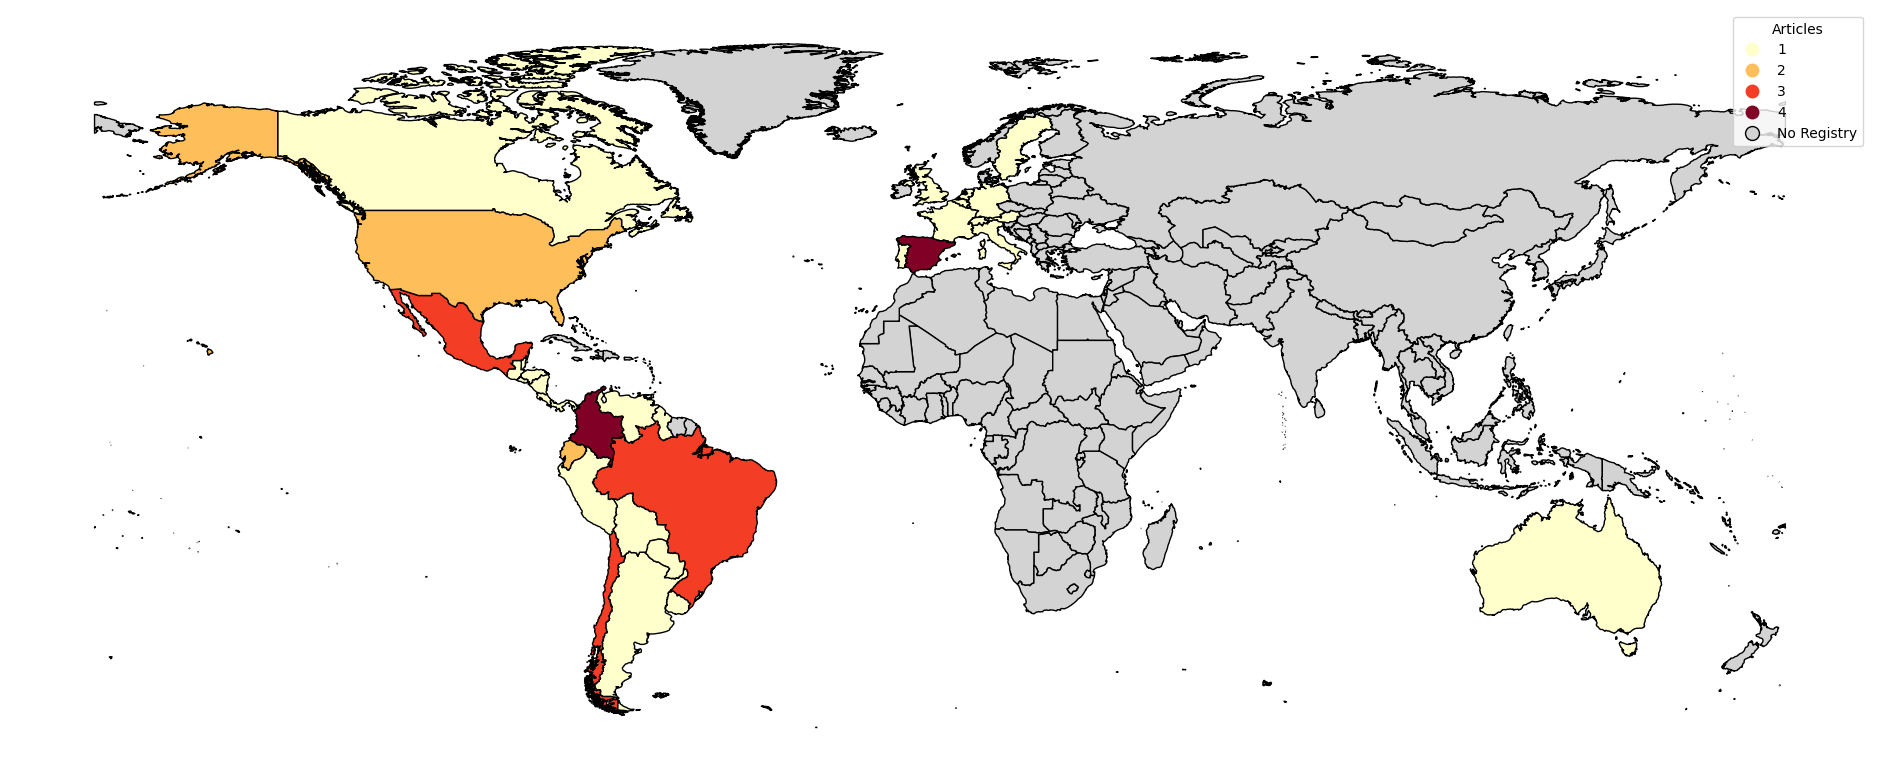

In [13]:
mapa1 = geodf.plot(
    figsize=(24,18),
    edgecolor='black',column='Number of articles',
    legend=True,
    categorical = True,
    cmap = 'YlOrRd',
    legend_kwds={'loc': 'upper right','fontsize':10,'frameon':True, 'ncol':1, 'title':'Articles'},
    missing_kwds =dict(color = 'lightgrey',label = 'No Registry',))
mapa1.axis('off')
leg = mapa1.get_legend()
plt.savefig(path_abs+path_mapas+'/mapa1.png')

## Variáveis contínuas

O processo de construção do mapa é idêntico, com a diferença de ser necessário construir a legenda contínua manualmente. Iniciamos com a importação da base.

In [15]:
df_2 = pd.read_excel(path_abs+path_bases+path_base_1, sheet_name = 'prevalencia_ihme')
df_2.head()

,ISO,Country,"Prevalent cases per 100,000 (2019)"
0,AF,Afghanistan,0.000000
1,AL,Albania,0.000000
2,DZ,Algeria,0.000000
3,AS,American Samoa,0.000000
4,AD,Andorra,21.046047


Arredondamos a última coluna para apenas duas casas decimais, com a função `round()`.

In [16]:
df_2['Prevalent cases per 100,000 (2019)'] = df_2['Prevalent cases per 100,000 (2019)'].round(2)
df_2.head()

,ISO,Country,"Prevalent cases per 100,000 (2019)"
0,AF,Afghanistan,0.00
1,AL,Albania,0.00
2,DZ,Algeria,0.00
3,AS,American Samoa,0.00
4,AD,Andorra,21.05


Repetimos, para fins didáticos, o processo de importação do *shapefile*.

In [21]:
gdf_1 = gpd.read_file(path_abs+path_shp+path_wc)
gdf_1.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,Afghanistan,AF,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,2,Albania,AL,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,3,Algeria,DZ,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,4,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,5,Andorra,AD,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Realizamos o *left join* entre os *dataframes*:

In [23]:
geodata = pd.merge(left=df_2, right=gdf_1,left_on='ISO', right_on='ISO', how='right')
geodata.head()

,ISO,Country,"Prevalent cases per 100,000 (2019)",FID,COUNTRY,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,AF,Afghanistan,0.00,1,Afghanistan,Afghanistan,AF,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,AL,Albania,0.00,2,Albania,Albania,AL,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,DZ,Algeria,0.00,3,Algeria,Algeria,DZ,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,AS,American Samoa,0.00,4,American Samoa,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,AD,Andorra,21.05,5,Andorra,Andorra,AD,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Eliminamos as colunas desnecessárias:

In [24]:
geodata = geodata.drop(columns = ['ISO','FID', 'Country', 'COUNTRYAFF', 'AFF_ISO'])
geodata.head()

,"Prevalent cases per 100,000 (2019)",COUNTRY,SHAPE_Leng,SHAPE_Area,geometry
0,0.00,Afghanistan,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,0.00,Albania,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,0.00,Algeria,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,0.00,American Samoa,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,21.05,Andorra,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Removemos novamente a Antártida, além de preencher com 0 os países com prevalência *NaN*.

In [25]:
geodata = geodata.query("COUNTRY != 'Antarctica'")
geodata['Prevalent cases per 100,000 (2019)'] = geodata['Prevalent cases per 100,000 (2019)'].fillna(0)

<ipython-input-25-68105c39a9e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geodata['Prevalent cases per 100,000 (2019)'] = geodata['Prevalent cases per 100,000 (2019)'].fillna(0)


Finalmente, convertemos o *dataframe* para *geodataframe*:

In [27]:
geodf = gpd.GeoDataFrame(geodata)
geodf.head()

,"Prevalent cases per 100,000 (2019)",COUNTRY,SHAPE_Leng,SHAPE_Area,geometry
0,0.00,Afghanistan,50.803210,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854..."
1,0.00,Albania,9.625038,3.073540,"POLYGON ((19.57083 41.68527, 19.58195 41.69569..."
2,0.00,Algeria,70.540082,213.513461,"POLYGON ((4.60335 36.88791, 4.63555 36.88638, ..."
3,0.00,American Samoa,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
4,21.05,Andorra,0.937352,0.055585,"POLYGON ((1.44584 42.60194, 1.48653 42.65042, ..."


Para construir o mapa, instaciamos a legenda contínua manualmente, como abaixo:

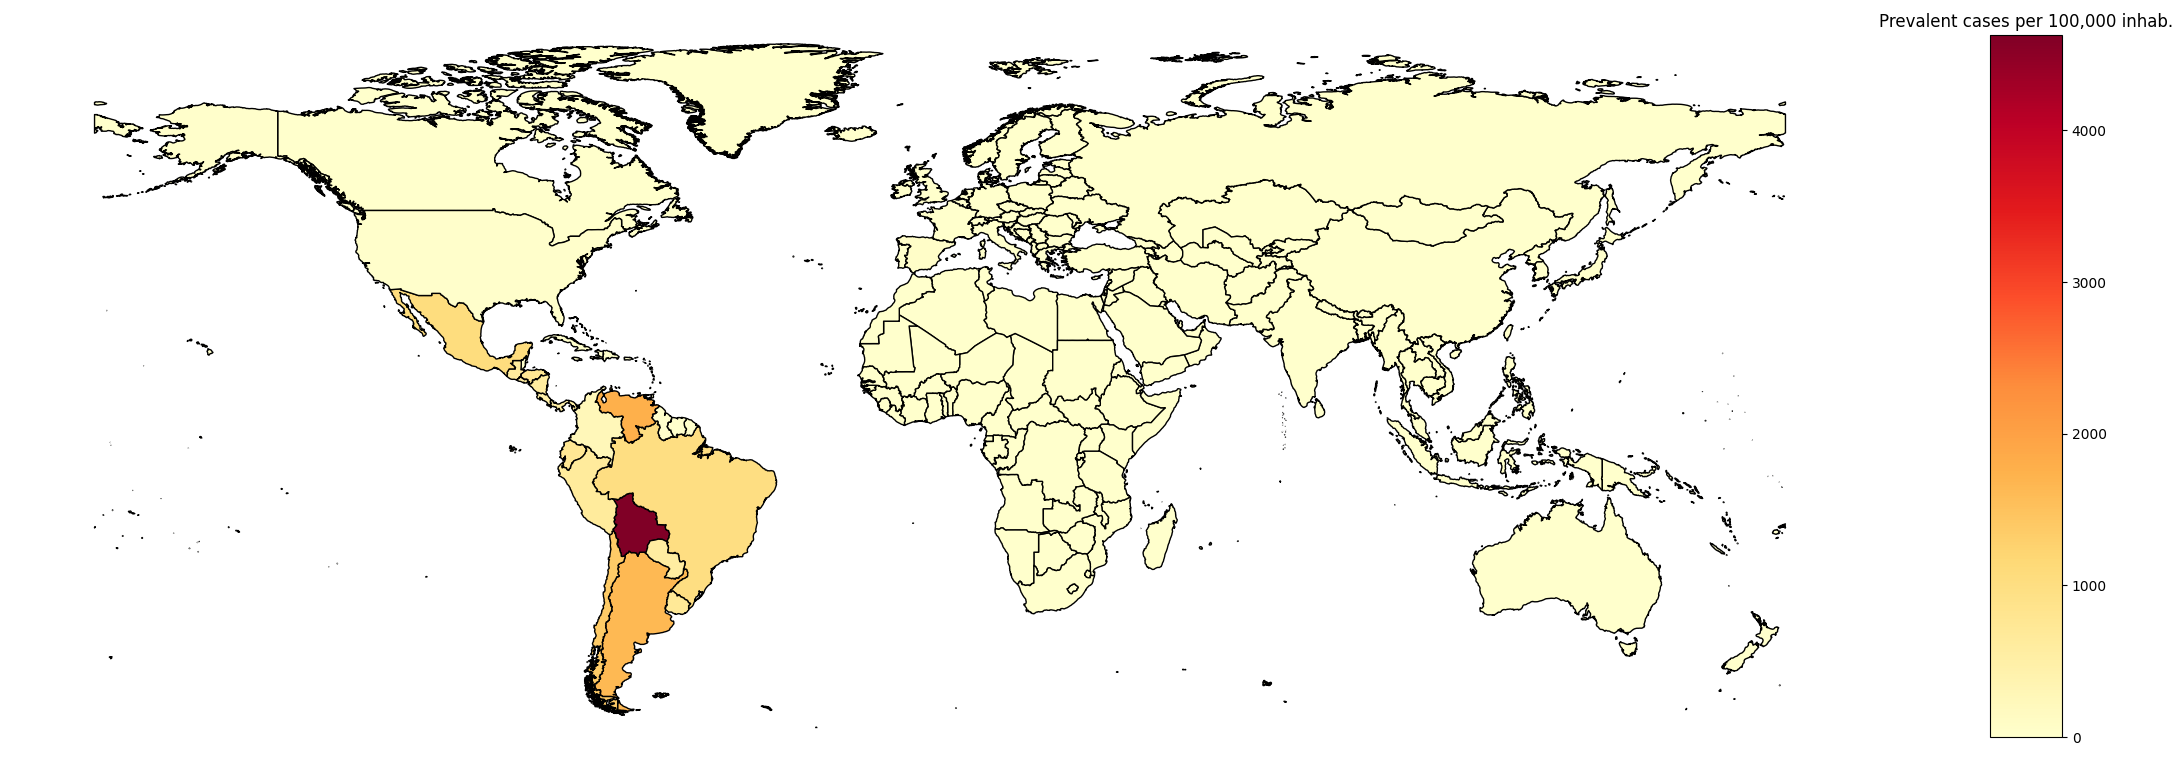

In [29]:
ax = geodf.plot(
    figsize=(24,18),
    edgecolor='black',column='Prevalent cases per 100,000 (2019)',
    cmap = 'YlOrRd')
ax.axis('off')
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])
cbax.set_title('Prevalent cases per 100,000 inhab.')
sm = plt.cm.ScalarMappable(cmap='YlOrRd', \
                norm=plt.Normalize(vmin=min(geodata['Prevalent cases per 100,000 (2019)']), vmax=max(geodata['Prevalent cases per 100,000 (2019)'])))
sm._A = []
fig.colorbar(sm, cax=cbax, format="%d")
plt.savefig(path_abs+path_mapas+'/mapa2.png')